In [47]:
model_name = 'Ralle'
model_variant = 'base'

In [48]:
import pandas as pd

df = pd.read_csv('../spotify_dataset.csv')
df = df.drop(columns=['Song ID', 'Artist', 'Number of Times Charted',
 'Week of Highest Charting', 'Song Name', 'Release Date', 'Streams', 'Popularity',
  'Weeks Charted', 'Index', 'Speechiness', 'Acousticness', 'Liveness', 'Duration (ms)', 'Artist Followers', 
  'Chord'])
df = df.replace(' ','0')

print('Shape of dataframe is:', df.shape)

df.head(5)

Shape of dataframe is: (1556, 7)


,Highest Charting Position,Genre,Danceability,Energy,Loudness,Tempo,Valence
0,1,"['indie rock italiano', 'italian pop']",0.714,0.8,-4.808,134.002,0.589
1,2,['australian hip hop'],0.591,0.764,-5.484,169.928,0.478
2,1,['pop'],0.563,0.664,-5.044,166.928,0.688
3,3,"['pop', 'uk pop']",0.808,0.897,-3.712,126.026,0.591
4,5,"['lgbtq+ hip hop', 'pop rap']",0.736,0.704,-7.409,149.995,0.894


In [49]:
import re

def trim_genres(df, column, genres):
    column_values = df[column]
    generalized_new_column = []    
    mismatch_lists = []

    for genre_list in column_values:
        if any(genre in genre_list for genre in genres):
            for genre in genres:
                if (genre in genre_list):
                    generalized_new_column.append(genre)
                    break
        else:
            print('No common genre found in:', genre_list)
            mismatch_lists.append(genre_list)
            generalized_new_column.append("Other")

    print('mismatch_list len', len(mismatch_lists))
    return generalized_new_column

unique_genres = []
for genre_list in df['Genre']:

    # convert "['rock', 'pop']" to actual array
    genre_list = genre_list[1:-1].strip().replace("'", "").split(",")

    for genre in genre_list:
        genre = genre.strip()
        if genre not in unique_genres:
            unique_genres.append(genre)
unique_genres

print("Number of unique genres:", len(unique_genres))
print("First ten unique genres:", unique_genres[:20])

genres = ['rap', 'pop', 'rock', 'drill', 'jazz', 'psych', 'sertanejo', 'lounge', 'dance', 'hip hop', 'k-pop', 'r&b', 'trap', 'latino', 'indie', 'metal', 'funk', 'reggaeton', 'punk', 'country']
print("Number of new unique genres", len(genres))
new_genres = trim_genres(df, 'Genre', genres)

# LABEL ENCODE CHORD 
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Genre'] = enc.fit_transform(new_genres)

Number of unique genres: 335
First ten unique genres: ['indie rock italiano', 'italian pop', 'australian hip hop', 'pop', 'uk pop', 'lgbtq+ hip hop', 'pop rap', 'dance pop', 'puerto rican pop', 'trap latino', 'latin', 'reggaeton', 'reggaeton colombiano', 'k-pop', 'k-pop boy group', 'canadian pop', 'post-teen pop', 'canadian contemporary r&b', 'gauze pop', 'indietronica']
Number of new unique genres 20
No common genre found in: 0
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: ['aussietronica']
No common genre found in: ['comic']
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found in: []
No common genre found i

In [59]:
# NORMALIZE TEMPO

def normalize(df, column):
    column_norm = df[column].values.astype(float)
    v_min = min(column_norm)
    v_max = max(column_norm)
    for i, v in enumerate(column_norm):
        column_norm[i] = (v-v_min)/(v_max-v_min)
    return column_norm

df['Tempo'] = normalize(df, 'Tempo')

df['Valence'] = df['Valence'].values.astype(float)
df['Danceability'] = df['Danceability'].values.astype(float)
df['Energy'] = df['Energy'].values.astype(float)
df['Loudness'] = df['Loudness'].values.astype(float)
df['Genre'] = df['Genre'].values.astype(float)


df['Highest Charting Position'] = df['Highest Charting Position'].values.astype(float)

print(df.dtypes)

df.head(5)

Highest Charting Position    float64
Genre                        float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Tempo                        float64
Valence                      float64
dtype: object


,Highest Charting Position,Genre,Danceability,Energy,Loudness,Tempo,Valence
0,1.0,10.0,0.714,0.800,-4.808,0.652802,0.589
1,2.0,5.0,0.591,0.764,-5.484,0.827819,0.478
2,1.0,10.0,0.563,0.664,-5.044,0.813204,0.688
3,3.0,10.0,0.808,0.897,-3.712,0.613946,0.591
4,5.0,13.0,0.736,0.704,-7.409,0.730713,0.894


In [60]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

X_train = training_data.drop('Highest Charting Position', axis=1)
y_train = training_data['Highest Charting Position']

X_test = testing_data.drop('Highest Charting Position', axis=1)
y_test = testing_data['Highest Charting Position']

X_train.shape, y_train.shape

((1244, 6), (1244,))

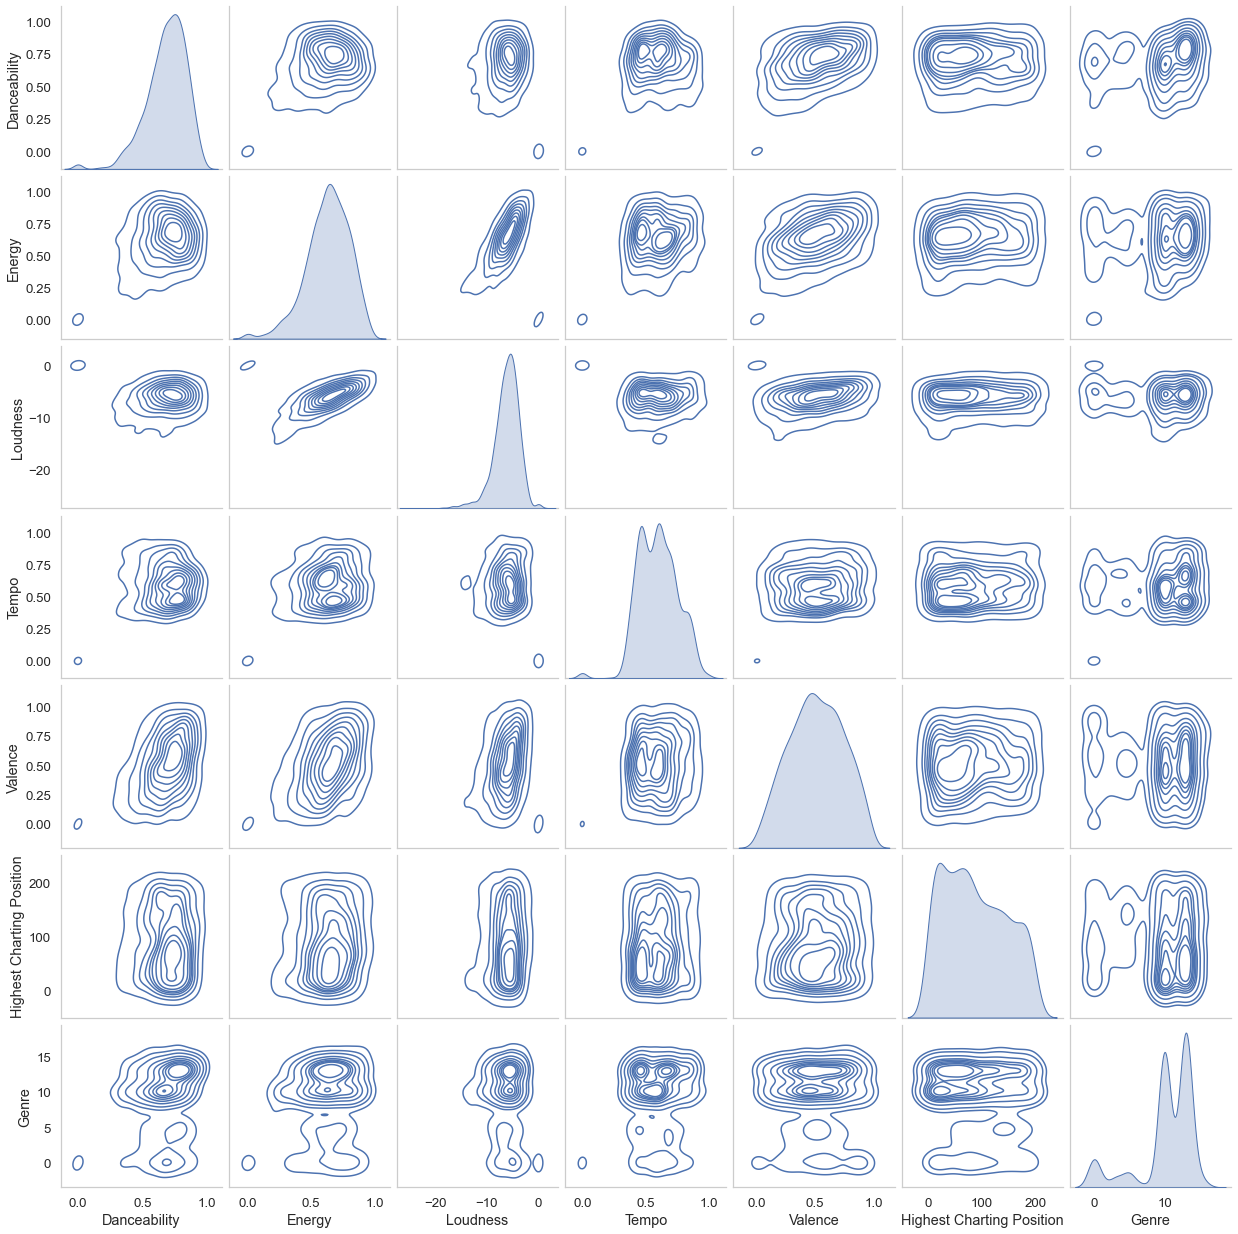

In [61]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,40)})
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
#map = sns.heatmap(X_train.corr(), annot = True, cmap = 'mako')
#'Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness', 'Tempo', 'Valence', 'Artist Followers', 'Highest Charting Position', 'Duration (ms)', 'Chord', 'Genre'
map = sns.pairplot(df[['Danceability', 'Energy', 'Loudness', 'Tempo', 'Valence', 'Highest Charting Position', 'Genre']], diag_kind='kde', kind='kde')
map.figure.savefig('C:/Users/Rasmu/Pictures/sns_vandmand_short.png', transparent=True)
#fig.savefig('C:/Users/Rasmu/Pictures/sns_vandmand.png', transparent=True)


In [62]:
# SETTING UP KERAS CALLBACKS

import os
import time
import tensorflow as tf
from keras import callbacks

# Borrowed from: https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        exp = lr0 * 0.1**(epoch / s)
        tf.summary.scalar('learning rate', data=exp, step=epoch)
        return exp
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=10)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# root_logdir = os.path.join(os.curdir, "./logged_models/" + model_name + '/' + model_variant)
# def get_run_logdir():
#     run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
#     return os.path.join(root_logdir, run_id)

# run_log_dir = get_run_logdir()
# file_writer = tf.summary.create_file_writer(run_log_dir + "/metrics")
# file_writer.set_as_default()

# tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_dir)

my_callbacks = [earlystopping, lr_scheduler]

In [67]:
from tensorflow.keras import layers
from tensorflow import keras
from keras.utils.vis_utils import plot_model

model = tf.keras.models.Sequential(
    [
        keras.layers.Dense(256, activation='relu', input_dim= X_train.shape[1]),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='relu')
    ]
)

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


model.summary()
plot_model(model, show_shapes=True)
model.fit(X_train, y_train, epochs=100, callbacks=my_callbacks, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               1792      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 67,841
Trainable params: 67,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 4609.2388 - accuracy: 0.0111 - val_loss: 4072.4961 - val_accuracy: 0.0080
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3685.4333 - accuracy: 0.0111 - val_loss: 3554.7996 - val_accuracy: 0.0080
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3441.2856 - a

In [68]:
predicted = model.predict(X_test, y_test.all())


predicted_display = pd.DataFrame({'Predicted Charting Position':predicted[:,0], 'Actual Charting Position':y_test})

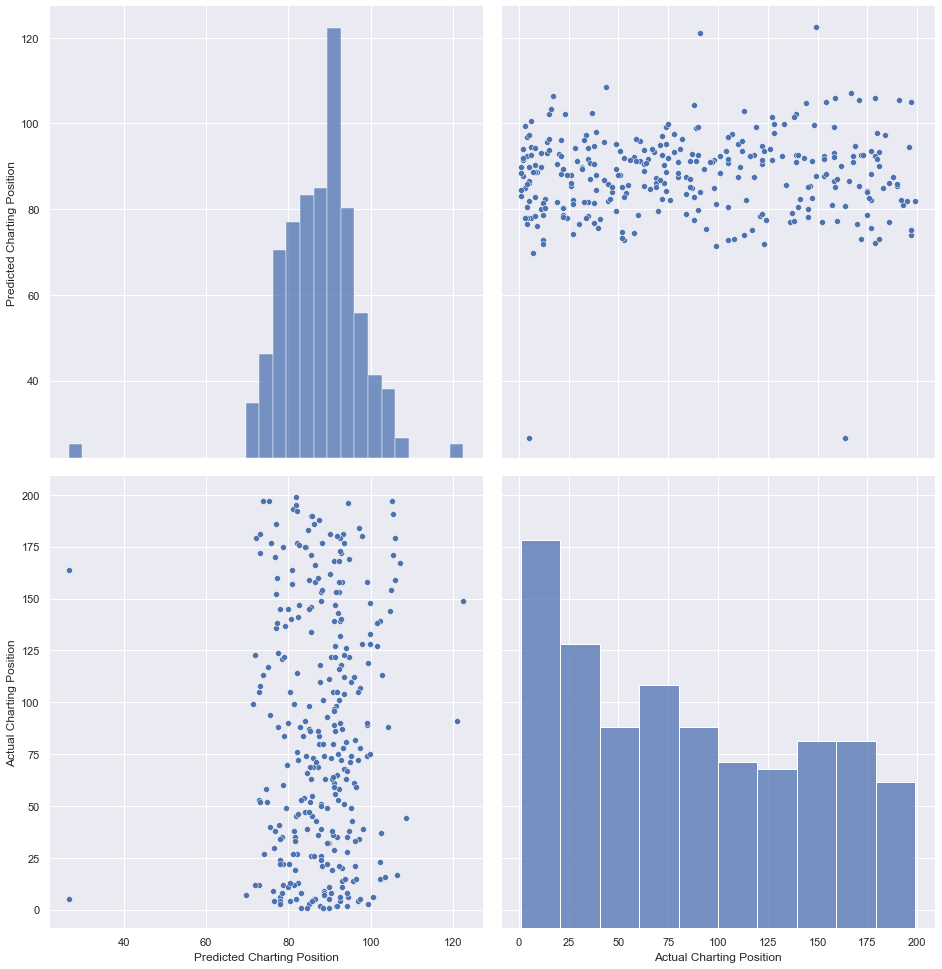

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set(font_scale=15)
sns.set(rc = {'figure.figsize':(20,20)})
sns.set(font_scale=1)
plot1 = sns.pairplot(predicted_display)
plot1.fig.set_size_inches(15,15)

plot1.figure.savefig('C:/Users/Rasmu/Pictures/sns_mlp_pred.png', transparent=True)



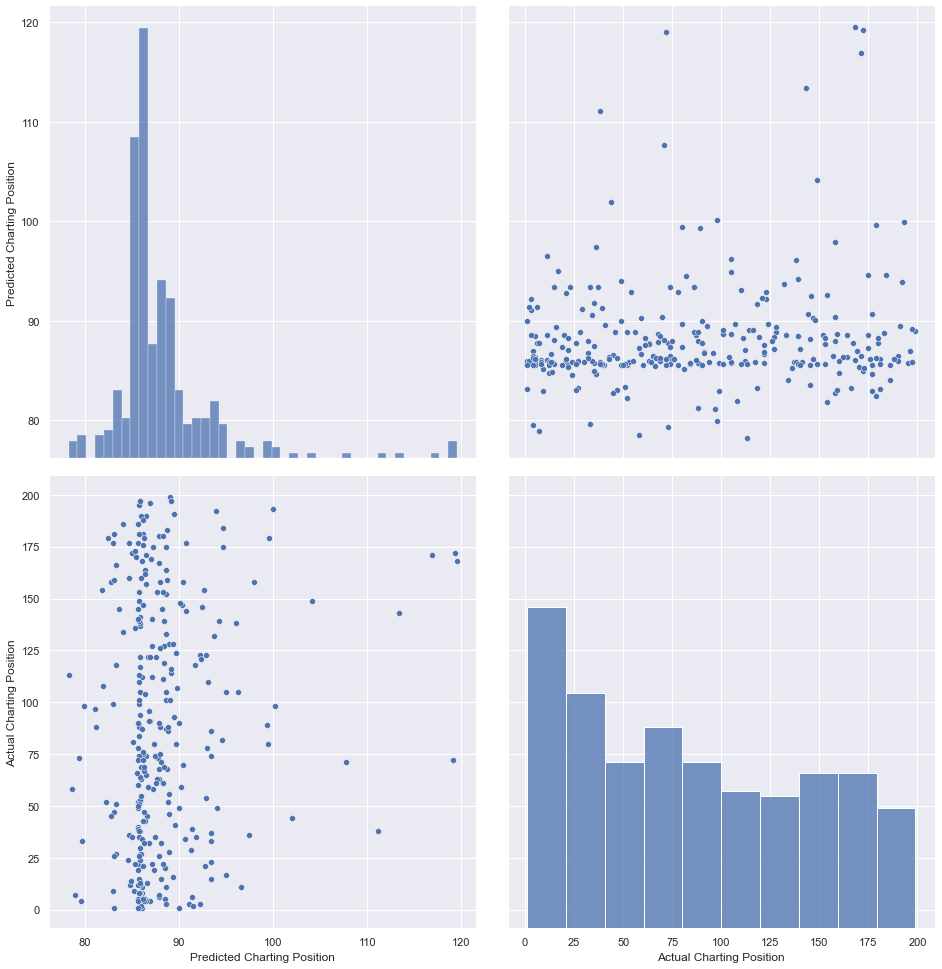

In [72]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

predicted_display2 = pd.DataFrame({'Predicted Charting Position':predicted, 'Actual Charting Position':y_test})

sns.set(rc = {'figure.figsize':(20,20)})
sns.set(font_scale=1)
plot2 = sns.pairplot(predicted_display2)
plot2.fig.set_size_inches(15,15)
plot2.figure.savefig('C:/Users/Rasmu/Pictures/sns_random_forest_pred.png', transparent=True)

